<a href="https://colab.research.google.com/github/AbdulMoiz-MMY/Agentic_AI_Learning/blob/main/Langchain_Hlo_wrd__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [ ]:
!pip install -q -U langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 32.9 MB/s eta 0:00:00


In [ ]:
!pip install -q -U langchain.google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [ ]:
First_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change this{question} into a good image generative promt?",
)

Second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template = "read this {first_response} and summarize into Two lines promt for image generation?",
)

Third_prompt = PromptTemplate(
    input_variables = ["second_response"],
    template = "generate the image {second_response} ?",
)


In [51]:
llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 75

)

In [ ]:
first_chain = First_prompt | llm
second_chain = Second_prompt | llm


In [ ]:
import torch
from diffusers import StableDiffusionPipeline # Changed from StableDiffusion3Pipeline


In [52]:



first_response = first_chain.invoke({"question": input("Write the Image generate promt?")})
print("First Chain",first_response.content)
second_response = second_chain.invoke({"first_response":first_response.content})
print("Second Chain ", second_response.content)

print()
print("Generate Image ")

# ... (rest of your code) ...

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",) # Using the correct pipeline class for v1.4
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

# ... (rest of your code) ...
image = pipe(second_response.content).images[0]

image.save("Find_generate_image.png")
print("Image Generate and saved as 'Find_generate_image.png'")


Write the Image generate promt?image of car
First Chain Please provide the image! I need to see the image of the car to generate a good image generation prompt.  I'll need to consider aspects like:

* **Make and Model:** Is it a classic car, a modern sports car, a rugged SUV, etc.?  Be as specific as possible.
* **Color:** What color is the car?  Include specific shades if possible (e.g., "British Racing Green," "Ferrari Red," "Midnight Blue").
* **Setting:** Where is the car located? (e.g., "on a deserted highway at sunset," "in a bustling city street," "parked in a garage").
* **Angle:** How is the car positioned? (e.g., "three-quarter view," "profile shot," "overhead shot").
* **Lighting:** What is the lighting like? (e.g., "dramatic lighting," "soft sunlight," "neon lights").
* **Style:** What artistic style should be used? (e.g., "photorealistic," "hyperrealistic," "impressionistic," "anime," "cyberpunk").
* **Details:** Are there any specific details that stand out? (e.g., "shiny

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image Generate and saved as 'Find_generate_image.png'


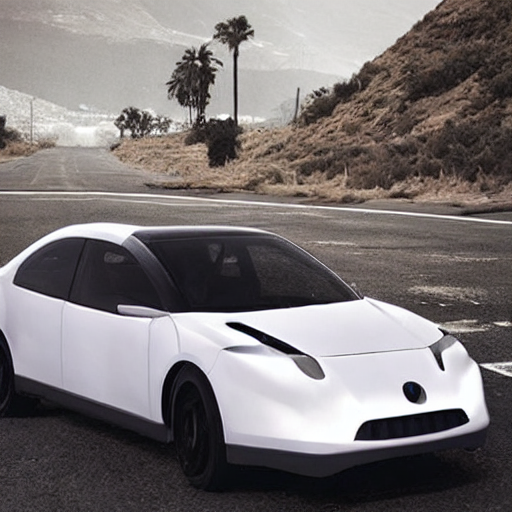

In [53]:
image